<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 01 - Classification: Eckelmans needs you!   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>
</font>


---
Table of content: 
* 1 - ECKELMANS NEEDS YOU! (25')
   - 1.1 - Context
   - 1.2 - Import the data
   - 1.2 - Data exploration
    <br><br>
* 2 - FEATURE SELECTION (30')
    <br><br>
* 3 - FEATURE STANDARDIZATION (45')
   - 3.1 - Data import
   - 3.2 - Models
    <br><br>
* 4 - DATA COMPLETION (20')
   - 4.1 - "Keep it all or drop it all" approach
   - 4.2 - Fill with the mean
   - 4.3 - Fill with the median
---

<br>

<br> <br>
        <font size=6 color=#009999> 1 - ECKELMANS NEEDS YOU! </font> <br>
<br>

<br>
<font size=5 color=#009999> 1.1 CONTEXT </font> <br>
<font size=4 color=#009999>
PREDICTION OF THE HOUSE QUALITY
</font> <br> <br>
</font>

Eckelmans is hiring... This well known estate agency in Louvain-la-Neuve wants now to become a leader for houses renting in every campus around the world! To achieve their objective, they need a data scientist to develop a tool that predicts the house quality based on some information (features) available in the Eckelmans database. Here is a description of the dataset: <br><br>


<table style="width:67%">
            <thead>
                <tr>
                    <th style="width:18%"> Feature Name</th>
                    <th> Description </th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="color:#003366"> <b> OverallQual </b> </td>
                    <td style="color:#003366"> <b>  Rates the overall quality and finish of the house (from 1-Very Poor to 10-Very Excellent)   </b>      </td>
                </tr>                
                <tr>
                    <td> SalePrice </td>
                    <td> Sale price of the property </td>
                </tr>
                <tr>
                    <td> LotFrontage </td>
                    <td> Linear feet of street connected to property </td>
                </tr>
                <tr>
                    <td> OverallCond </td>
                    <td> Rates the overall condition of the house (from 1-Very Poor to 10-Very Excellent) </td>
                </tr>
                <tr>
                    <td> LotArea </td>
                    <td> Lot size in square feet </td>
                </tr>
                <tr>
                    <td> YearBuilt </td>
                    <td> Original construction date </td>
                </tr>
                <tr>
                    <td> YearRemodAdd </td>
                    <td> Remodel date (same as construction date if no remodeling or additions) </td>
                </tr>
                <tr>
                    <td> MasVnrArea </td>
                    <td> Masonry veneer area in square feet </td>
                </tr>
                <tr>
                    <td> BsmtUnfSF </td>
                    <td> Unfinished square feet of basement area </td>
                </tr>
                <tr>
                    <td> TotalBsmtSF </td>
                    <td> Total square feet of basement area </td>
                </tr>
                <tr>
                    <td> 1stFlrSF </td>
                    <td> First Floor square feet </td>
                </tr>
                <tr>
                    <td> 2ndFlrSF </td>
                    <td> Second floor square feet </td>
                </tr>
                <tr>
                    <td> GrLivArea </td>
                    <td> Above grade (ground) living area square feet </td>
                </tr>
                <tr>
                    <td> TotRmsAbvGrd </td>
                    <td> Total rooms above grade (does not include bathrooms) </td>
                </tr>
                 <tr>
                    <td> GarageArea </td>
                    <td> Size of garage in square feet </td>
                </tr>
                <tr>
                    <td> OpenPorchSF </td>
                    <td> Open porch area in square feet </td>
                </tr>
                <tr>
                    <td> EnclosedPorch </td>
                    <td> Enclosed porch area in square feet </td>
                </tr>
                <tr>
                    <td> 3SsnPorch </td>
                    <td> Three season porch area in square feet </td>
                </tr>
                <tr>
                    <td> ScreenPorch </td>
                    <td> Screen porch area in square feet </td>
                </tr>
                <tr>
                    <td> PoolArea </td>
                    <td> Pool area in square feet </td>
                </tr>
            </tbody>
    </table>      
<br>

The objective is to predict the overall quality stored in the column named `OverallQual`.


<br><br>
<font size=5 color=#009999> 1.2 IMPORT THE DATA </font> <br>
<font size=4 color=#009999>
BASIC PANDAS TOOLS
</font> <br> <br>

[Pandas](https://pandas.pydata.org/docs/) is an open-source Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Those data structures are designed to handle common data processing operations. <br><br>

First, let's import the dataset and display some basic information. 

In [1]:
import pandas as pd


# After talking with the business section of Eckelman, we decide to keep 19 selected features.
keepFeature = ['OverallQual', 'LotFrontage', 'SalePrice', 'OverallCond', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
               'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 
               'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea']
fullData    = pd.read_csv("house_prices.csv")
data        = fullData[keepFeature]
# Save this reduced dataset for later
data.to_csv("HousePrices19Features.csv", index=False)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   SalePrice      1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  TotRmsAbvGrd   1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  OpenPorchSF    1460 non-null   int64  
 16  EnclosedPorch  1460 non-null   int64  
 17  3SsnPorch      1460 non-null   int64  
 18  ScreenPo

,OverallQual,LotFrontage,SalePrice,OverallCond,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,7,65.0,208500,5,8450,2003,2003,196.0,150,856,856,854,1710,8,548,61,0,0,0,0
1,6,80.0,181500,8,9600,1976,1976,0.0,284,1262,1262,0,1262,6,460,0,0,0,0,0
2,7,68.0,223500,5,11250,2001,2002,162.0,434,920,920,866,1786,6,608,42,0,0,0,0
3,7,60.0,140000,5,9550,1915,1970,0.0,540,756,961,756,1717,7,642,35,272,0,0,0
4,8,84.0,250000,5,14260,2000,2000,350.0,490,1145,1145,1053,2198,9,836,84,0,0,0,0


<br> <br>
<font size=5 color=#009999> 1.3 - DATA EXPLORATION </font> <br>
<font size=4 color=#009999>
PLOTLY AS VISUALIZATION TOOL 
</font> <br> <br>

<div class="alert alert-info">
<b>EXERCISE 1</b> <br>
In the following plots, we are going to compare the target, <code>OverallQual</code>, with respect to all the other features. Are there features more interesting than others? <b>Select the three best features</b>, motivate briefly your choice.
</div> 

You can change the variable `cols`, if you want to plot less or more pictures for each row.


In [2]:
# Nothing to do in this cell :) Run me!

import plotly.graph_objects as go
from helping_functions import plot_comparison_target_feature

plot_comparison_target_feature(data, cols=3)

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
A good feature should be informative to predict the target, i.e. if one knows the value of the feature it provides information about the value of the target. This implies that there is a relation between the feature and the target. This relation can be linear or not. <br><br>
    
We comment below some graphs: <br>
<ol>
   <li> <b>OverallQual vs OverallQual</b><br>
       Of course, we observe a perfect correlation between OverallQual (the target) and itself. But remember that we do not have access to the target value for the prediction. So this feature should not be selected as a good feature to predict the target. 
       <img src="FeedbackImgs/1_corr1.png" width = "300">
       
   <li> <b>SalePrice vs OverallQual</b><br>
       There is a clear relation between SalePrice and the target. If we assume that this relation is linear, we can say that there is a linear correlation between the two features. This makes the feature relevant for the prediction.<br>
       Note that the correlation is positive (if one value is increasing, so is the other). Then, can be a negative correlation relevant for prediction?
       <img src="FeedbackImgs/1_corr2.png" width = "300">
       
   <li> <b>OpenPorchSF vs OverallQual</b><br>
       Such plot is hard to interpret. Correlation is not straitforward to identify... 
       <img src="FeedbackImgs/1_corr3.png" width = "300">
</ol>    
</div>    

Comparing all the plots is a tedious task, we would like to have all the information on the same graph! Hopefully, we can use the **correlation matrix**, as a tool to visually show all the correlation between features.

<div class="alert alert-info">
<b>EXERCISE 2</b> <br>
Check that the three best features you chose in the previous question are the good ones.
</div> 


In [3]:
# Nothing to do in this cell :) Run me!

from helping_functions import plot_correlation_matrix

plot_correlation_matrix(data)

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
3 interresting remarks:
<ol>
   <li> <b>The diagonal is always equal to 1.</b> <br>
       The correlation with a feature and itself is always one. 
   <li> <b>The matrix is symmetric.</b> <br>
       The order of comparison does not matter, corr(a,b) = corr(b,a).
   <li> <b>Either dark red or dark blue values are the most relevant.</b> <br>
       Dark blue values correspond to hard negative correlations. It means that if the value increases, the target decreases. Such information is relevant for prediction. In this dataset, we mostly have positive correlations.<br>
       Note that the 4 last features (EnclosedProch, 3SnPorch, ScreenPorch, PoolArea) seem not relevant since their correlation with the target is near to zero. 
</ol>    
</div>    

<br><br>
<font size=5 color=#009999> 2 - FEATURE SELECTION  </font> <br>
<font size=4 color=#009999> 
REDUCE THE NUMBER OF FEATURES BY SELECTING THE MOST RELEVANT ONES
</font> <br> <br>

Modern day datasets are very rich in information due to the simplicity of the data collection process.
This makes the data high dimensional and it is quite common to see datasets with hundreds of features. <br>


Feature Selection/Extraction aims to reduce the number of dimensions while minimizing information loss. When presented data have very high dimensionality, models usually choke because:
   - Training time increases exponentially with number of features. Resources need also to be allocated for uninformative features. 
   - Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly.
    
**Feature selection** is "the process of selecting a subset of relevant features for processing, without any transformation". Such methods consider the relationship between features and the target variable to compute the importance of features. In this exercice session, we will quantify this relation by the use of the correlation between each variable and the target variable.

 

**Feature extraction** "aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features)". This new reduced set of features should then be able to summarize most of the information contained in the original set of features. A classical way to perform feature extraction is to use a dimensionality reduction tool such as the principal component analysis (PCA).

 

<img src="Imgs/dimensionality_reduction.jpg" width = "250">

<div class="alert alert-info">
<b>EXERCISE 3 </b> <br>
You are asked to implement <b>feature selection</b> by selecting the features that are the 5 most correlated - in absolute value - to the target variable.<br>
    Do the same with the 12 most correlated features.
</div> 


Note: the function [`corrwith`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html) from the <samp>pandas</samp> library may be useful. 


In [4]:
data = pd.read_csv("HousePrices19Features.csv")

# Remove features with NaN
data.drop(["LotFrontage"], axis=1, inplace=True)
data.drop(["MasVnrArea"], axis=1, inplace=True)

"""--------------------------------------------------
Select the N most correlated features

INPUT: 
    - df: data (DataFrame)
    - n: number (int)
OUTPUT:
    - out: N most correlated features (Series)
--------------------------------------------------"""
def feature_selection_corr(dataFrame, n):
    out = dataFrame.corrwith(dataFrame['OverallQual']).abs().sort_values(ascending=False).head(n + 1)
    out.drop(["OverallQual"], axis=0, inplace=True)
    return out

print("The 5 most correlated features are: \n{}".format(feature_selection_corr(data, 5)))
datab = feature_selection_corr(data, 5)

The 5 most correlated features are: 
SalePrice       0.790982
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
dtype: float64


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
The features kept are:
<ol>
   <li> SalePrice
   <li> GrLivArea
   <li> YearBuilt
   <li> GarageArea
   <li> YearRemodAdd
</ol>    
This can been verified manually by checking the values in the correlation matrix above.
</div>    

<br><br>
<font size=5 color=#009999> 3 - FEATURE STANDARDIZATION  </font><br>
<font size=4 color=#009999>
A MATTER OF UNITS...
</font> <br> <br>

Unfortunately, Eckelman's revenues plummeted, and we are restricted to work with only the following features: `SalePrice` and `LotArea` to predict `OverallQual`.

Three of your friends **A**lice, **B**ob and **S**tanley have been assigned the tedious task of Eckelman's classification: given the sale price and the area of a house, they have to predict whether the quality of that house is high or low.

They already agreed on the model classifier: a simple K-nearest neigbhors (K-NN) should be enough. However, they strongly disagree on which units to use.

- Alice is from the United States of **A**merica and would rather use the imperial system of units. Besides, the original data is given in square feet (sq. ft) and US dollars (USD).
- Bob comes from Syldavia, where the currency is the **B**itcoin (XBT) and the surface is expressed in square smoot.
- Stanley does not want to pick a side: he chose to **S**tandardize the data.
    
<div class="alert alert-block alert-success">
<b>Smoot:</b> 
The smoot is a nonstandard, humorous unit of length created as part of an MIT fraternity prank. It is named after Oliver R. Smoot (...), who in October 1958 laid down repeatedly on the Harvard Bridge  (between Boston and Cambridge, Massachussetts) so that his fraternity brothers could use his height to measure the length of the bridge.<br><br>
     <a href="https://en.wikipedia.org/wiki/Smoot">Source</a> of this useless information :-)
</div>

<br><br>
<font size=5 color=#009999> 3.1 - DATA IMPORT </font> <br>
<font size=4 color=#009999>
ONE NUMPY ARRAY PER UNITS
</font> <br> <br>
</font> 

<div class="alert alert-info">
<b>EXERCISE 4 </b> <br>
Create <b>numpy arrays</b> containing the features of interests. Here, we will consider that the <i>target variable</i>, $y$, is a binary variable that equals <b>zero</b> if the <code>OverallQual</code> is evaluated to five or less, and <b>one</b> otherwise. <br>
You may want to have a look to pandas' <a href="https://scikit-learn.org/stable/modules/preprocessing.html">preprocessing</a> package for Stanley's data.
</div> 


In [5]:
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("house_prices.csv")
data = data.head(50)

# Creating features in Smoots and Bitcoins ($1 is 10000 XBT)
data["LotAreaB"]   = data["LotArea"] * 0.0320782
data["SalePriceB"] = data["SalePrice"] / 10000

# Feature matrix (numpy.ndarray) of the three friends
X_data_A = np.array(data[["LotArea", "SalePrice"]])
X_data_B = np.array(data[["LotAreaB", "SalePriceB"]])


# TODO: Create a numpy array with the features of interests standardized 
scaler = preprocessing.StandardScaler()
X_data_S = scaler.fit_transform(X_data_A)


# TODO: Create a numpy array containing the targets
y = np.where(data.OverallQual > 5, 1, 0)
print(y)

[1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0]


<br><br>
<font size=5 color=#009999> 3.2 - MODELS </font> <br>
<font size=4 color=#009999>
FIT A K-NN MODEL
</font> <br> <br>
</font> 

A possible approach comparing the quality of respectively  **A**, **B** and **S** choice, is the computation of the percentage of well-classified data. To evaluate a method, you could train a model and assess the training quality. But in this case, a "method" that simply memorized the data would have a perfect score but is unable to generalize. Yet, your goal is to classify data with unknown label. Therefore, you should test the model on _unseen_ data (i.e. that was not in the training set). It is therefore useful to split your dataset into two parts: one for training and one for testing.

<div class="alert alert-info">
<b>EXERCISE 5 </b> <br>
In order to get familiar with sklearn philosophy, let's start with a simple exercise: we implemented for you a (dummy) separation in train and test sets. 
<ol>
   <li> Use the train set to <b>fit</b> a K-NN (with default parameter), 
   <li> <b>predict</b> the result of your fitted model on the test set and finally,
   <li> compute the <b>score</b> of your model. 
</ol>
</div> 

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Dummy separation into train and test sets
n_a, _  = X_data_A.shape

n_train = n_a // 2
n_test  = n_a - n_train

X_train = X_data_A[0:n_train, :]
y_train = y[0:n_train]
X_test  = X_data_A[n_train:, :]
y_test  = y[n_train:]


# TODO: create your K-NN classifier
nber_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=nber_neighbors)

# TODO: fit your classifier on your train set
clf.fit(X_train, y_train)

# TODO: predict the output of the test set
y_pred = clf.predict(X_test)


print('True test values are', np.array(y_test))
print('Predicted values are', y_pred)

# Here we simply compute the score :)
score = np.sum(np.equal(y_pred, np.array(y_test)))/n_test

print('Percentage of well-classified points ', score)

True test values are [1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0]
Predicted values are [1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0]
Percentage of well-classified points  0.76


<div class="alert alert-info">
<b>EXERCISE 6 </b> <br>
Now, create a function <code>fit_model(X, y, clf)</code> that takes as arguments: the data, the objective/target, and a classifier. This function trains the classifier on 70% of the data and tests it on the remaining 30% (You should use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>train_test_split</a> for train/test set separation). 
<code>fit_model</code> should return the classifier, the training data and objective, the testing data and objective as well as the score obtained by the classifier. 
</div> 

In the packages `helping_functions`, we implemented for you `vis_clf`, a function that allows to visualize the results of a classifier provided the data (see the signature of the function for more details).



In [7]:
from sklearn.model_selection import train_test_split

""" -----------------------------------------------------------------------------------------
Split the data into training (70%) and test (30%) set and fit the model using the training set
INPUT: 
    - X: initial features
    - y: initial objective
    - clf: classifier
OUTPUT:
    - clf: fitted classifier
    - X_train: training set
    - y_train: training objective
    - X_test: test set
    - y_test: test objective
    - score: mean accuracy on the test data.
----------------------------------------------------------------------------------------- """
def fit_model(X, y, clf):   
    # TODO:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    return clf, X_train, y_train, X_test, y_test, score

<div class="alert alert-info">
<b>EXERCISE 7 </b> <br>
Create a model with 5 neighbors and distance-based weights and visualize its performances, you can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNeighborsClassifier</a> from <code>sklearn</code>.
</div> 


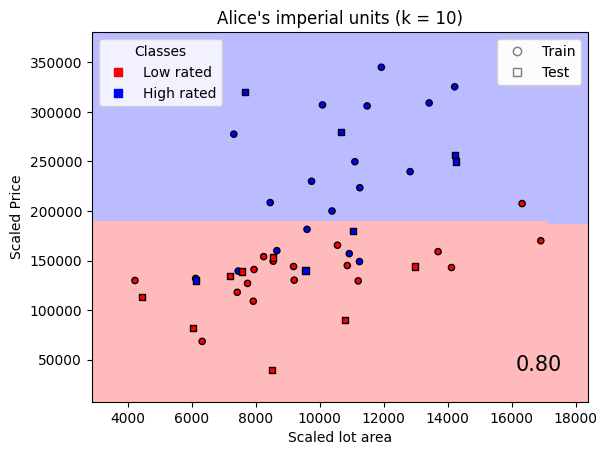

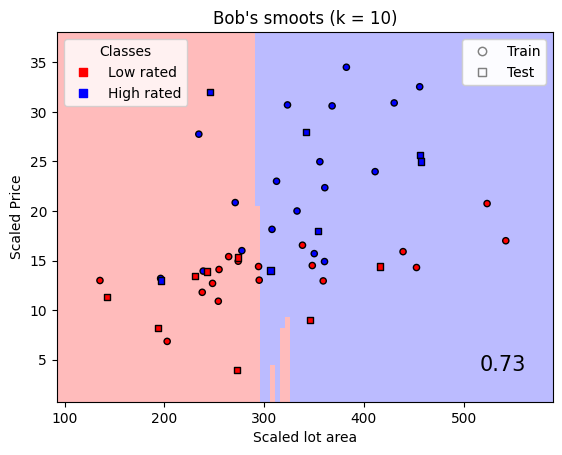

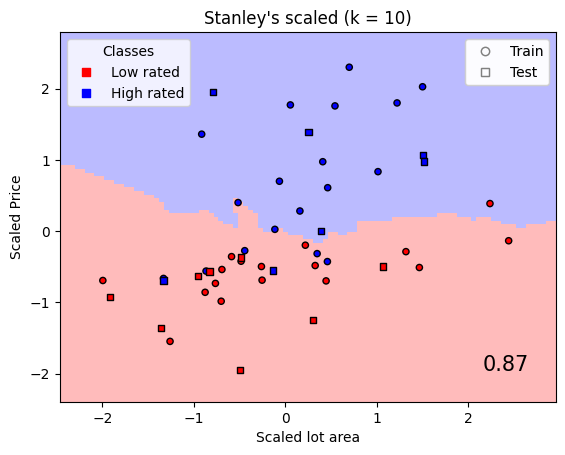

In [8]:
from helping_functions import vis_clf

%matplotlib inline

# Create labels
names    = ['Alice\'s imperial units', 'Bob\'s smoots', 'Stanley\'s scaled']
x_labels = ['Lot area [sq. ft]', 'Lot area [smoot^2]', 'Scaled lot area']
y_labels = ['Price [USD]', 'Price [XBT]', 'Scaled Price']

# TODO: Build model
n_neighbors = 10
clf         = KNeighborsClassifier(n_neighbors=n_neighbors) 

# Create a dictionary X_dic with `names` as keys and your data as values.
X_dic = {'Alice\'s imperial units': X_data_A, 'Bob\'s smoots': X_data_B, 'Stanley\'s scaled': X_data_S}

for (name, x_label, y_label) in zip(names, x_labels, y_labels):    
    X = X_dic[name]
    # TFit your model yo your data with a test set of 30% and a random_state of 42    
    clf, X_train, y_train, X_test, y_test, score = fit_model(X, y, clf)
    # Use vis_clf to vizualize the performances of your classifier
    vis_clf(clf, X, X_train, y_train, X_test, y_test, score, n_neighbors, name,
            "Scaled lot area", "Scaled Price")
    

<div class="alert alert-info">
<b>EXERCISE 8 </b> <br>
Compare the three plots, and explain the differences. Which of the three versions would you choose?<br>
Play with the parameter `n_neighbors`, how does the plots change?<br>
Rerun the code on the whole data, and interpret the results for the scaled version.
</div> 


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

As seen below, the general trends of the three plots are completely different. It reflects that the data scaling has a siginificative impact on the prediction. This property is unwanted... We would like our model to work independently of the data unit. <br>
<ol>
    <li> <b>Alice</b><br>
        The separation between the two classes (blue and red) is mostly influenced by the price. A small change in the price affects a lot the predicted house quality. 
       <img src="FeedbackImgs/3-2_A.png" width = "500">
    <li> <b>Bob</b><br>
        The separation between the two classes (blue and red) is mostly influenced by the lot area. A small change in the lot area affects a lot the predicted house quality. 
       <img src="FeedbackImgs/3-2_B.png" width = "500">
    <li> <b>Stanley</b><br>
        Both features are scaled in the same way (the price varies approx. between -2 and 2 and the area varies approx. between -2 and 2). It seems that both features will impact the final prediction.
       <img src="FeedbackImgs/3-2_C.png" width = "500">
</ol>
<br>
    
    
If we compare the 3 graphs, the decision boundary of Stanley is the smoothest. The two other decisions boudaries are sharp which can possibly indicates that the model is overfitting. Also, the score (predicted on the test set) on Stanley's data is the best. <br><br>
    
    
The number of neighbors has also an impact on the classification. If we fix n_neighbors=1, we assign to each new data the label of the closest sample in the database. Meaning that if there is a misclassified sample, all new data that are close to this sample will be misclassified. The model is too sensitive to noise. <br>
On the contrary, if we fix n_neighbors=n_samples (the number of training samples), the model will always predict the same label which is the most reprensented in the dataset. The model is not sensitive to the data.<br><br>
    
<b> Remark:</b> You may obtain slightly different results depending on the train/test set split. If you want to reproduce the same plots than ours, fix the parameter random_state=42 of the train_test_split function.
</div>

<br><br>
<font size=5 color=#009999> 4 - DATA COMPLETION </font> <br>
</font> 
<font size=4 color=#009999>
HOW CAN WE HANDLE NANs?
</font> <br> <br>

Finally, Eckelman could invest in a third feature: the `LotFrontage`. 
- `LotFrontage`: the amount of streets connected to property in feet

Unfortunately, this feature is incomplete and cannot be used directly. To improve your algorithm you have therefore two choices: either you neglect the incomplete data, or you try to fill them with clever inputs, in this case the mean or the median.

Note that you should also use the two features from previous section: `SalePrice` and `LotArea`.


<div class="alert alert-info">
<b>EXERCISE 9 </b> <br>
Before implementing these two choices, let's analyze the feature <code>LotFrontage</code>: visualize the statistics of this variable using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">pandas.describe </a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html">pandas.boxplot </a>. Do you think that there is a better approach <i>a priori</i>?
</div> 


count     42.000000
mean      72.095238
std       19.498355
min       33.000000
25%       60.000000
50%       70.000000
75%       84.000000
max      115.000000
Name: LotFrontage, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
42 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


<Axes: >

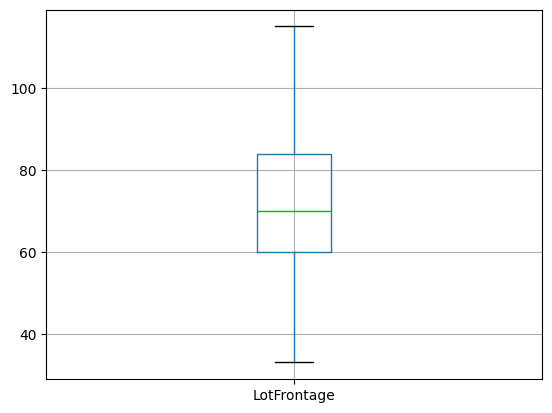

In [9]:
%matplotlib inline 

# For visualization purpose, we work with the 50 first observations
data = pd.read_csv("house_prices.csv")
data = data.head(50)

# Print the description of the new feature and (box) plot it
dataLF = data["LotFrontage"]
print(dataLF.describe())
dataLF.info()
data.boxplot(column="LotFrontage")

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
There are 8 missing values out of 50 samples, which is quite important. It is likely that discarding 16% of the data to train our model could have an impact on the performance. <br>
Mean and Median are quite similar. We do not expect to observe big differences between replacing NANs values with the mean vs. with the median. 
</div>

<br><br>
<font size=5 color=#009999> 4.1 - "KEEP IT ALL OR DROP IT ALL" APPROACH </font> <br>
</font> 
<font size=4 color=#009999>
THE GARBAGE
</font> <br> <br>

<div class="alert alert-info">
<b>EXERCISE 10 </b> <br>
In this first approach, you will neglect data with missing values. To do so, remove all data with missing <code>LotFrontage</code>, and indicate how much data you are removing. 

You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a> function from pandas. <br>
    Use functions created in section 3.2 (<code>fit_model</code> and <code>vis_clf</code>) to create a function, `fit_vis`, that fits and visualizes the data. Observe your results. Do not forget to standardize your data! Is your classifier better than in previous section? Why is it so?
</div> 

In [10]:
%matplotlib notebook

def fit_vis(X_data, y, n_neighbors, str_method):
    """ -----------------------------------------------------------------------------------------
    Create a K-NN classifier, fit it and compute its score using fit_model, and visualize it using vis_clf
    INPUT:
        - X_data: features 
        - y: objective
        - n_neihbors: number of neighbors used in the K-NN
        - str_method: name of the method used to tackle NA values
    OUTPUT:
        - VOID: Visualization of the performance of the K-NN model fitted and tested using X_data.
    ----------------------------------------------------------------------------------------- """
    # TODO: create your classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf, X_train, y_train, X_test, y_test, score = fit_model(X_data, y, clf)
    score = clf.score(X_test, y_test)
    print("The score of the model is: ", score)
    
    vis_clf(clf, X_data, X_train, y_train, X_test, y_test, score, n_neighbors, str_method,
            "Scaled lot area", "Scaled Price")
    print('Tackling NA values with:', str_method)

data2     = data[['LotArea', 'SalePrice', 'LotFrontage','OverallQual']]

# TODO: use dropna to drop data with missing values (modify data2)
data_KD   =  data2.dropna()
X_data_KD = np.array(data_KD[["LotArea", "SalePrice", "LotFrontage"]]) 

# Should you standardize your features?
# TODO: obtain the binary target vector
y_KD      = np.where(data_KD['OverallQual'] > 5, 1, 0)
print(y_KD)

scaler = preprocessing.StandardScaler()
X_data_KD = scaler.fit_transform(X_data_KD)
n_neighbors = 5
fit_vis(X_data_KD, y_KD, n_neighbors, "Keep it all or drop it all")

[1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 0]
The score of the model is:  0.6923076923076923


<IPython.core.display.Javascript object>

Tackling NA values with: Keep it all or drop it all


<br>
<font size=5 color=#009999> 4.2 - FILLING APPROACH </font> <br>
<font size=4 color=#009999> MEAN </font> <br>
</font> 

<div class="alert alert-info">
<b>EXERCISE 11 </b> <br>
Now, we will try to fill the missing values with the mean of <code>Lot Frontage</code>. For this purpose, you should use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">fillna</a>  and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a> functions of pandas. Do the completion before the standardization.  


Again, using `fit_vis` observe and comment what you obtain in this case. 
</div> 

 

In [11]:
%matplotlib notebook

# TODO: use fillna to fill missing values (modify data2)
data_Mean   = data2.fillna(data2.mean())
X_data_Mean = np.array(data_Mean[["LotArea", "SalePrice", "LotFrontage"]]) 

# Should you standardize your features?
scaler = preprocessing.StandardScaler()
X_data_Mean = scaler.fit_transform(X_data_Mean)
n_neighbors = 5
fit_vis(X_data_Mean, y, n_neighbors, "Filling with the mean")

The score of the model is:  0.8666666666666667


<IPython.core.display.Javascript object>

Tackling NA values with: Filling with the mean


<br>
<font size=5 color=#009999> 4.3 - FILLING APPROACH </font> <br>
<font size=4 color=#009999> MEDIAN </font> <br>
</font> 


<div class="alert alert-info">
<b>EXERCISE 12 </b> <br>
Finally, we try to fill the missing values with the median of `Lot Frontage`. For this purpose, you should use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">fillna</a>  and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html">median</a> functions of pandas. 

Again, using `fit_vis` observe and comment what you obtain in this case. Was your hypothesis about the best approach for data completion correct? 
</div> 

<div class="alert alert-block alert-success">
<b>Note:</b> 
There exist other ways to fill the missing data, using for example information about the neighboring points, but this is out of the scope of this course. :) 
</div>


In [12]:
%matplotlib notebook

# TODO: use fillna to fill missing values (modify data2)
data_Median   = data2.fillna(data2.median())
X_data_Median = np.array(data_Median[["LotArea", "SalePrice", "LotFrontage"]])

# Should you standardize your features?
scaler = preprocessing.StandardScaler()
X_data_Median = scaler.fit_transform(X_data_Median)
n_neighbors = 5
fit_vis(X_data_Median, y, n_neighbors, "Filling with the median")

The score of the model is:  0.8666666666666667


<IPython.core.display.Javascript object>

Tackling NA values with: Filling with the median


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
As expected, the performances obtained with the "keep it all or drop it all" approach is worse than replacing missing values with either the mean or the meadian (0.77 vs 0.93). It indicades that usefull information was contained in rows with NANs. <br>
Here, 3D plots are not sufficient to conlude anything. The visualization in 3D is hard to interpret. 
</div>